<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-анализ-данных" data-toc-modified-id="Первичный-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный анализ данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Проект: «Защита персональных данных клиентов»

Необходимо защитить данные клиентов страховой компании.

**Цели:** 

1. Разработать метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.
2. Проверить, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.
2. Обосновать корректность работы разработанного метода.

**Описание данных:**
- *Признаки:*
    - пол;
    - возраст;
    - зарплата;
    - члены семьи.
    
    
- *Целевой признак:*
    - страховые выплаты.


## Первичный анализ данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
try:
    df = pd.read_csv('insurance.csv')
except FileNotFoundError:
    df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.columns = ['gender', 'age', 'income', 'family', 'insurance_payments']

In [4]:
df.head(10)

,gender,age,income,family,insurance_payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
gender                5000 non-null int64
age                   5000 non-null float64
income                5000 non-null float64
family                5000 non-null int64
insurance_payments    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
print(f'Количество дубликатов в датафрейме: {df.duplicated().sum()}')

Количество дубликатов в датафрейме: 153


In [7]:
df.describe()

,gender,age,income,family,insurance_payments
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


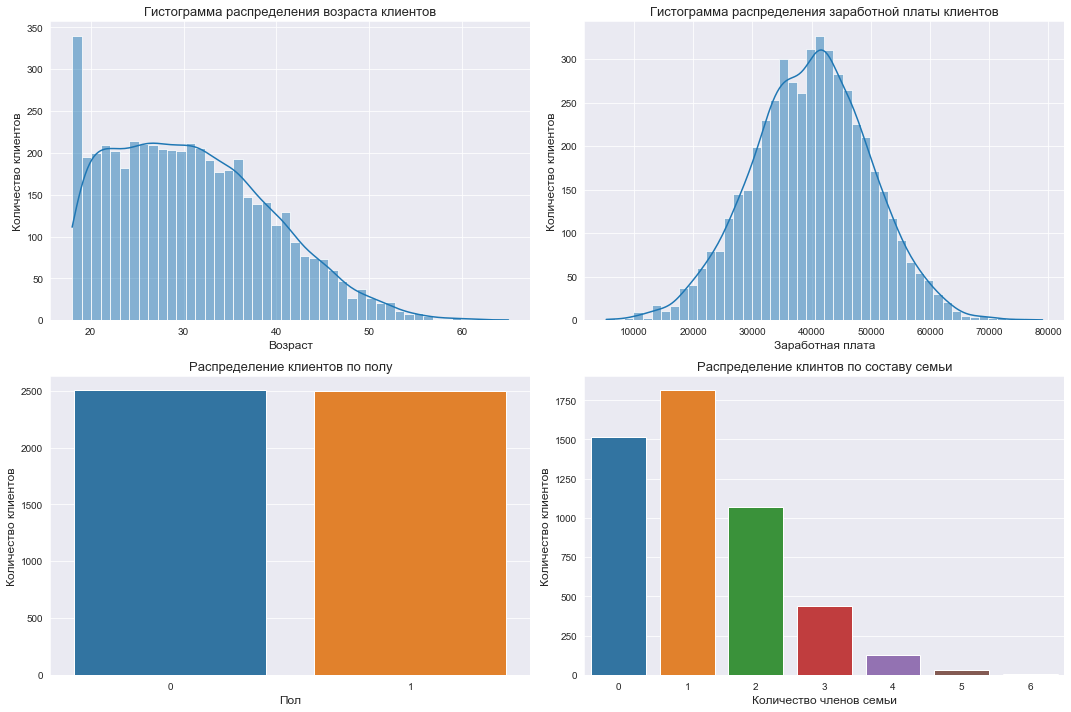

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['age'], bins=len(df['age'].unique()), ax=axs[0, 0], kde=True)
sns.histplot(df['income'], ax=axs[0, 1], kde=True)
sns.countplot(data = df, x = 'gender', ax=axs[1, 0])
sns.countplot(data = df, x = 'family', ax=axs[1, 1])

axs[0, 0].set_title('Гистограмма распределения возраста клиентов', fontsize=13)
axs[0, 0].set_xlabel('Возраст', fontsize=12)
axs[0, 0].set_ylabel('Количество клиентов', fontsize=12)

axs[0, 1].set_title('Гистограмма распределения заработной платы клиентов', fontsize=13)
axs[0, 1].set_xlabel('Заработная плата', fontsize=12)
axs[0, 1].set_ylabel('Количество клиентов', fontsize=12)

axs[1, 0].set_title('Распределение клиентов по полу', fontsize=13)
axs[1, 0].set_xlabel('Пол', fontsize=12)
axs[1, 0].set_ylabel('Количество клиентов', fontsize=12)

axs[1, 1].set_title('Распределение клинтов по составу семьи', fontsize=13)
axs[1, 1].set_xlabel('Количество членов семьи', fontsize=12)
axs[1, 1].set_ylabel('Количество клиентов', fontsize=12)

fig.tight_layout();

**Выводы:**
1. Пространство признаков состоит из 4 числовых признаков.
2. Исходные данные не содержат пропущенных значений.
3. Исходные данные содержат *153* повторяющихся значения.
4. Каких-либо аномалий в данных не обнаружено.

## Предобработка данных

In [9]:
df[['age', 'income']] = df[['age', 'income']].astype('int64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
gender                5000 non-null int64
age                   5000 non-null int64
income                5000 non-null int64
family                5000 non-null int64
insurance_payments    5000 non-null int64
dtypes: int64(5)
memory usage: 195.4 KB


## Умножение матриц

**Необходимо:** 
1. Ответить на вопрос: изменится ли качество линейной регрессии, если признаки умножают на обратимую матрицу? 
2. Обосновать решение.
3. Указать, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

*Линейная регрессия:*

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц) — $m\times n$

- $P$ — случайная обратимая матрица — $n\times n$

- $E$ — единичная матрица

- $y$ — вектор целевого признака

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** 

При умножении матрицы признаков на случайную обратимую матрицу, качество линейной регресии не изменится.

**Обоснование:**

Представим матрицу признаков в виде произведения исходной матрицы признаков со случайной обратимой матрицей — $XP$, тогда:

Предсказания:


$$
a' = XPw'
$$


Задача обучения:


$$
w' = \arg\min_w MSE(XPw', y)
$$


Формула обучения:


$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$


Воспользовавшись свойством транспонированых матриц получаем:


$$
w' = (P^T X^T XP)^{-1} P^T X^Ty
$$


Сгруппируем и раскроем скобки:


$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^Ty
$$


Произведение $(P^T)^{-1}P^T$ образует единичную матрицу, следовательно:

$$
w' = P^{-1} (X^T X)^{-1} EX^Ty = P^{-1} (X^T X)^{-1} X^Ty
$$


Так как $(X^T X)^{-1} X^Ty = w$, то отсюда получаем:


$$
w' = P^{-1}w
$$

Следовательно формулу для расчета предсказаний можно представить в следующем виде:


$$
a' = XPw' = XPP^{-1}w
$$

Произведение $PP^{-1}$ образует единичную матрицу, следовательно:


$$
a' = XEw = Xw = a
$$

Приведено доказательство того, что предсказания $a'$ для матрицы признаков $X$, умноженных на обратимую матрицу $P$ равны предсказаниям $a$. Следовательно, при умножении матрицы признаков на случайную обратимую матрицу — качество линейной регрессии не изменится.

Параметры линейной регрессии в исходной задаче и в преобразованной  связаны следующим образом:

$$
w' = P^{-1}w
$$

## Алгоритм преобразования

**Необходимо** разработать алгоритм преобразования данных для решения поставленной задачи.

In [11]:
def encoder(features):
    """функция-преобразователь исходных данных в зашифрованный вид"""

    while True:
        random_matrix = np.random.normal(size=(features.shape[1], features.shape[1]))
        if np.linalg.det(random_matrix) == 0:
            continue
        else:
            result = features.dot(random_matrix)
            key = np.linalg.inv(random_matrix)
            break
            
    return result, key

## Проверка алгоритма

In [12]:
features = df.drop('insurance_payments', axis=1)
transform_features, key = encoder(features)
target = df['insurance_payments']

In [13]:
r2 = []

for x in [features, transform_features]:
    model = LinearRegression()
    model.fit(x, target)
    r2.append(r2_score(target, model.predict(x)))
    
print(f'Коэффициент детерминации или R2 при обучении на исходных признаках — {round(r2[0], 5)}')
print(f'Коэффициент детерминации или R2 при обучении на зашифрованных признаках — {round(r2[1], 5)}')

Коэффициент детерминации или R2 при обучении на исходных признаках — 0.42495
Коэффициент детерминации или R2 при обучении на зашифрованных признаках — 0.42495


**Декодирование признаков**

In [14]:
df2 = round(abs(transform_features.dot(key))).join(target)
df2.columns = df.columns
df2 = df2.astype('int64')
df2.head(10)

,gender,age,income,family,insurance_payments
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0
5,1,43,41000,2,1
6,1,39,39700,2,0
7,1,25,38600,4,0
8,1,36,49700,1,0
9,1,32,51700,1,0


## Общий вывод

Перед нами стояла задача разработать метод преобразования данных клиентов страховой компании, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность работы разработанного метода.

*Полученные результаты:* 
- при умножении матрицы признаков на случайную обратимую матрицу — качество линейной регрессии не изменяется;
- параметры линейной регрессии в исходной задаче и в преобразованной  связаны следующим образом:

$$
w' = P^{-1}w
$$

При практической проверке разработанного алгоритма с помощью *LinearRegression* из библиотеки *Sklearn* были полученные следующие значения *R2*:

- при обучении на исходных признаках — 0.42495;
- при обучении на зашифрованных признаках — 0.42495.

С помощью обратной матрицы к использованной случайной матрице алгоритм позволяет полностью дешифровать данные.